# Ciência dos Dados - Projeto 2 

### Integrantes:
    Diogo Duarte
    Jorás Oliveira
    Pedro Mahfuz
    Rodrigo Furukawa

### Bibliotecas

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Explicando o projeto

Neste projeto nos temos um dataset referente a derrames. A tabela revela se a pessoa teve derrame ou não, e junto com esta informação, há outras relacionadas a dados médicos e pessoais na tentativa de detalhar melhor o cenário. Tendo isso em vista, tivemos a ideia de trabalhar com a pergunta de prever se a pessoa terá ou não um derrame de acordo com seus dados médicos e pessoais. Para poder responder esta pergunta iremos abordar os modelos de análise Regressão Logística e Random Forest.

### Fazendo a leitura de nosso dataset

In [3]:
import chardet
with open('healthcare-dataset-stroke-data.csv', 'rb') as rawdata: # Abre o dataset
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
dados = pd.read_csv('healthcare-dataset-stroke-data.csv',encoding='utf-8') # Faz a leitura do Dataset.
dados

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
del dados['id'] # Remove colunas desnecessárias, no caso 'id' contém um numero unico para cada pessoa, que faz o dado se tornar irrelevante para a pesquisa
dados = dados.dropna(subset = ['bmi']) # Removendo todas as linhas que contem 'NaN' em bmi

In [6]:
dados

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
derrame = dados.loc[dados["stroke"] == 1, :]

In [8]:
derrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
nDerrame = dados.loc[dados["stroke"] == 0, :]

In [10]:
nDerrame.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [11]:
dados.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


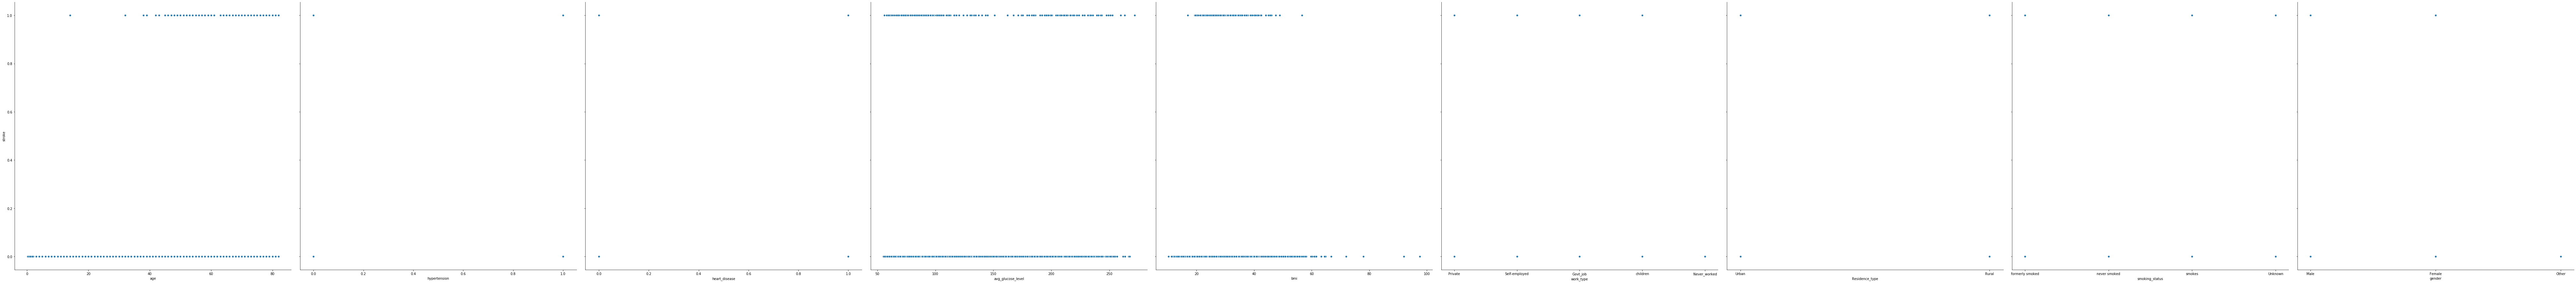

In [12]:
sns.pairplot(
    dados,
    x_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type', 'Residence_type', 'smoking_status', 'gender'],
    y_vars = ['stroke'],
    height = 12,
)

### Explicando o Pairplot

Para as features "idade", "Hipertensão","Problemas Cardíacos" , "Nível médio de Glucose" , "Índice de Massa Corporal" , "Tipo de Trabalho","Local de moradia","Histórico de fumante" e "Sexo", decidimos testar plotando os gráficos em formas individuais, como pode ser visto acima. Entretanto desta forma muitos deles são pouco intuitivos e dificeis de serem interpretados, por isso decidimos fazer histogramas para as features não contempladas por este parágrafo.

Quando analisamos o gráfico de idade é possível perceber raros casos de derrames em pessoas com menos de 40 anos, sendo muito mais frequentes os casos por volta de 60.

Quando analisamos o gráfico sobre o nível médio de glucose no sangue dos indivíduos, observamos que dos que tiveram derrame os principais focos estao por volta de 100 de 220 mg/dL. Sendo considerado o normal de acordo com os médicos 100 mg/dL. 

Quando analisamos o gráfico sobre o índice de massa corporal dos individuos, observamos que raros casos de derrame acontecem em pessoas com índice maior que 50 e abaixo de 23 kg/m**2 . Sendo o ideal entre 18.5 e 25 de acordo com os médicos.

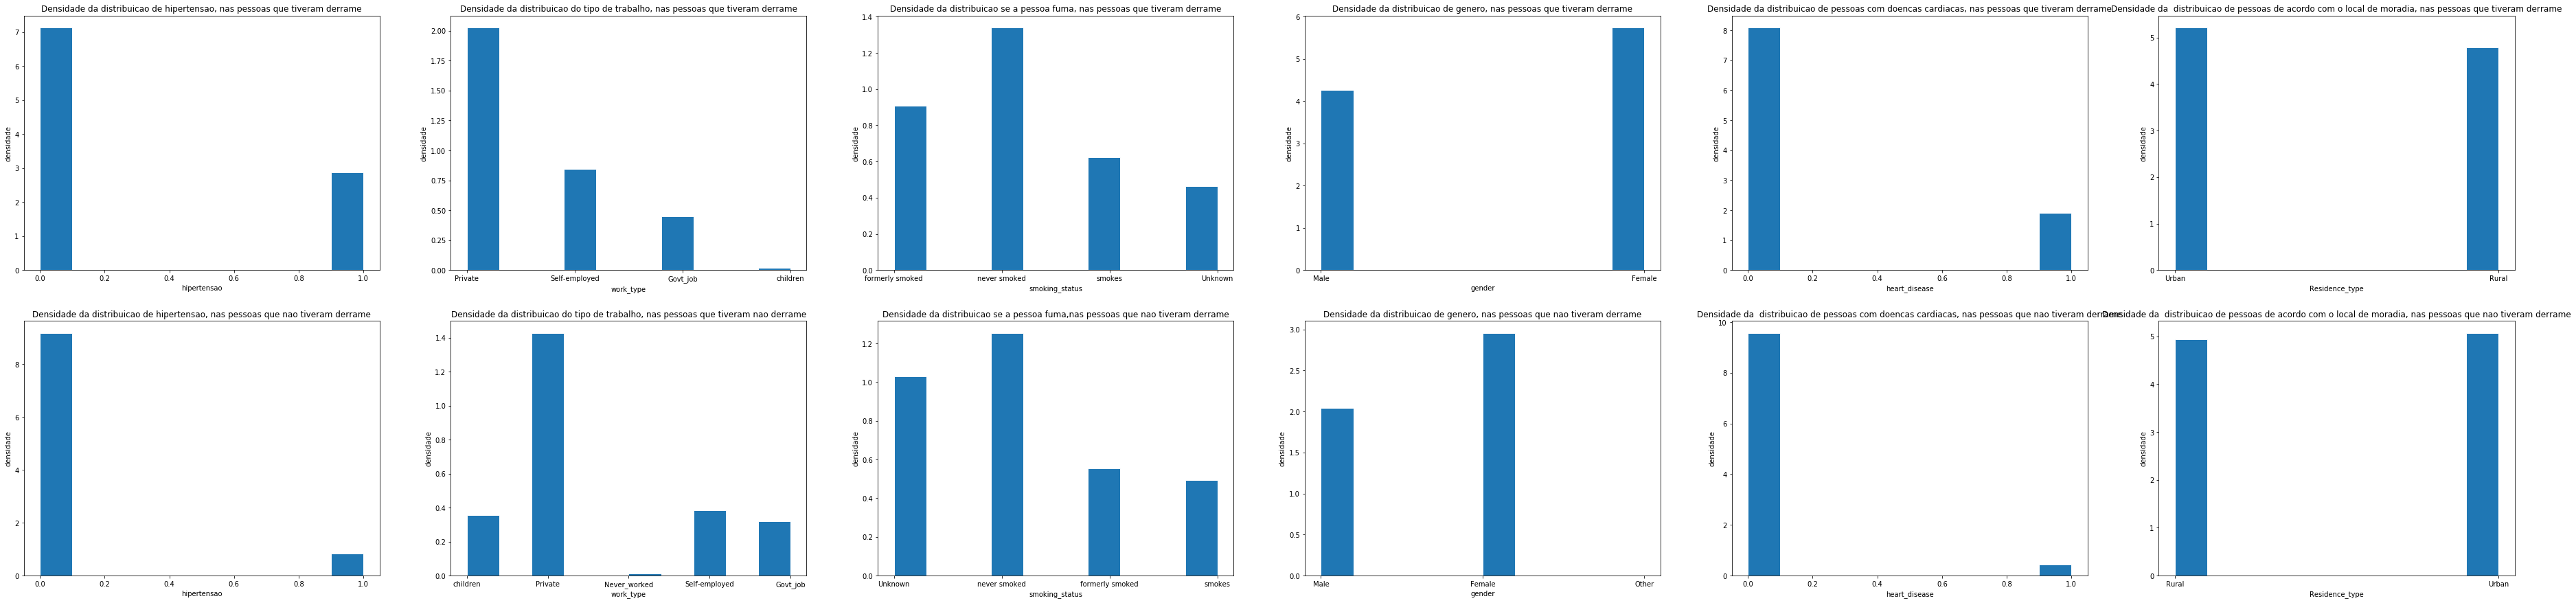

In [13]:
plt.figure(figsize=(65, 15))

plt.subplot(261)
plt.hist(derrame['hypertension'], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de hipertensao, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('hipertensao')

plt.subplot(267)
plt.hist(nDerrame['hypertension'], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de hipertensao, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('hipertensao')

plt.subplot(262)
plt.hist(derrame["work_type"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao do tipo de trabalho, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('work_type')

plt.subplot(268)
plt.hist(nDerrame["work_type"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao do tipo de trabalho, nas pessoas que tiveram nao derrame")
plt.ylabel('densidade')
plt.xlabel('work_type')

plt.subplot(263)
plt.hist(derrame["smoking_status"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao se a pessoa fuma, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('smoking_status')

plt.subplot(269)
plt.hist(nDerrame["smoking_status"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao se a pessoa fuma,nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('smoking_status')

plt.subplot(264)
plt.hist(derrame["gender"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de genero, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('gender')

plt.subplot(2,6,10)
plt.hist(nDerrame["gender"], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de genero, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('gender')

plt.subplot(265)
plt.hist(derrame['heart_disease'], edgecolor='white', density=True)
plt.title("Densidade da distribuicao de pessoas com doencas cardiacas, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('heart_disease')

plt.subplot(2, 6, 11)
plt.hist(nDerrame['heart_disease'], edgecolor='white', density=True)
plt.title("Densidade da  distribuicao de pessoas com doencas cardiacas, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('heart_disease')

plt.subplot(266)
plt.hist(derrame['Residence_type'], edgecolor='white', density=True)
plt.title("Densidade da  distribuicao de pessoas de acordo com o local de moradia, nas pessoas que tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('Residence_type')

plt.subplot(2, 6, 12)
plt.hist(nDerrame['Residence_type'], edgecolor='white', density=True)
plt.title("Densidade da  distribuicao de pessoas de acordo com o local de moradia, nas pessoas que nao tiveram derrame")
plt.ylabel('densidade')
plt.xlabel('Residence_type')

plt.show()

### Explicando os gráficos de cada feature relacionada com a target

Aqui decidimos fazer o uso de histogramas para mostrar como a distribuiçao de pessoas que tiveram, ou não, um derrame é feita de acordo com cada feature, uma vez que o gráfico anterior não era capaz de nos mostrar nenhum tipo de conclusão.


Nos histogramas de hipertensão, observamos que as pesoas com hipertensão tem quase 3 vezes mais chance de ter um derrame comparado a não ter um. 

Nos histograma sobre o tipo de trabalho que exerce, observamos que o número de crianças a terem um derrame é próximo de 0 e que pessoas "self employed", ou seja, que são seus proprios chefes tendem 2 vezes mais a ter derrame do qeu não tê-lo. 

Nos histogramas sobre o histórico de cada indivíduo relacionado à fumar, observamos não haver um impacto significante em ter um derrame ou não, uma vez que ambos os histogramas seguem a mesma tendência em valores similares.


Nos histogramas sobre o sexo de cada indivíduo, observamos não haver um impacto significante em ter um derrame ou não, uma vez que ambos os histogramas seguem a mesma tendência em valores similares.


Nos histogramas sobre problemas cardíacos, observamos que pessoas com problemas cardíacas tendem 4 vezes mais a ter um derrame comparado a não tê-lo.

Por fim, analisando os histogramas sobre o local de residência de cada indivíduo, observamos que essa não é uma feature que impacta no fator ter ou não um ataque cardíaco, já que ambos os histogramas se mostram muito similares.

### Começando a Regressão Logistíca

Regressão Logística é uma técnica de estatística que permite a predição de valores a partir de uma variável categórica, geralmente binária. Mais informação sobre Regressão Logística: https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf

In [37]:
#Transformando variáveis qualitativas em quantitativas
pd.get_dummies(dados).head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [40]:
# Definindo as variáveis features 
X = dados[['gender','age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'work_type', 'Residence_type', 'smoking_status']]

X = pd.get_dummies(X)

#Definindo a variável target
y = dados[['stroke']]

In [44]:
# Separando a parte de teste da de treinamento, a partir do train_test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
# Criando a Regressão Logística
LR = LogisticRegression()

In [47]:
# Aplicando o método
LR.fit(x_train, y_train)

/Users/Diogo/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Diogo/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Obtendo a acurácia do modelo de Regressão Logística
score = LR.score(x_test, y_test)
print(score)

0.9600977198697068
